In [1]:
# -*- coding: utf-8 -*-
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False 


#Define GenerateData(n,low,up,w)
#generate n groups of data with lower bound (low) and upper bound (up)
#w is the target function
def GenerateData(n,low,up,w):
    m = len(w)
    data = []
    X1 = np.array([])
    Y1 = np.array([])
    X2 = np.array([])
    Y2 = np.array([])
    while(len(data) < n):
        x = np.array(1)
        x = np.append(x,np.random.uniform(low,up,size = m - 1))
        if(x.dot(w) >= 0.1):
            X1 = np.append(X1,x[1])
            Y1 = np.append(Y1,x[2])
            x = np.append(x,1)
        elif(x.dot(w) <= -0.1):
            X2 = np.append(X2,x[1])
            Y2 = np.append(Y2,x[2])
            x = np.append(x,-1)
        data.append(np.array(x))
    return data,X1,Y1,X2,Y2


    

In [2]:
#Define Adaline(n,m,k,w0,low,up,iteration=1000)，n training set，m test set，k is the parameter,w0 target function，iteration
def Adaline(n,m,k,w0,low,up,iteration = 1000):
    d = len(w0)
    #generate n training set
    data,X1,Y1,X2,Y2 = GenerateData(n,low,up,w0)
    #generate m test set 
    test = GenerateData(m,low,up,w0)[0]
    
    # define sign()
    def sign(x):
        if x >= 0:
            return 1
        else:
            return -1
    
    #check if all the data are classified 
    def Judge(x,w):
        flag = 1
        for i in x:
            if sign(i[:d].dot(w))*i[-1] < 0:
                flag = 0
                break
        return flag
    
    #steps
    T = 0
    #initilize w
    w = np.ones(d)
    while(Judge(data,w) == 0 and T < iteration):
        i = data[random.randint(0,n-1)]
        s = i[:d].dot(w)
        a = s * i[-1]
        if a <= 1:
            w += k * (i[-1] - s) * i[:d]
            T += 1
    
    #error rate
    error = 0
    #print(type(test))
    for i in test:
        if sign(i[:3].dot(w)) * i[-1] < 0:
            error += 1
    print("n:" + str(k) + "error rate is" + str(error/m))
    
    #w0+w1*x+w2*y=0
    X3 = np.arange(low,up,0.01)
    Y3 = np.array([(X3[i] * w[1] + w[0]) / (-w[2]) for i in range(len(X3))])

    #target function
    X4 = np.arange(low,up,0.01)
    Y4 = np.array([(X3[i] * w0[1] + w0[0])/(-w0[2]) for i in range(len(X4))])

    #plot
    plt.scatter(X1,Y1,c='r',s=1)
    plt.scatter(X2,Y2,c='b',s=1)
    plt.plot(X3,Y3,label="("+str(w[0])+")+("+str(w[1])+")x+("+str(w[2])+")y=0")
    plt.plot(X4,Y4,label="("+str(w0[0])+")+("+str(w0[1])+")x+("+str(w0[2])+")y=0")
    plt.title(u"after" + str(T)+u"iterations")
    #set ranges
    #plt.xticks(np.arange(0,10))
    #plt.yticks(np.arange(0,10))
    plt.legend()
    plt.show()

n:1error rate is0.1116


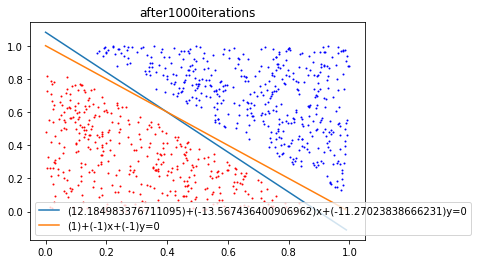

In [6]:
Adaline(1000,10000,1,np.array([1,-1,-1]),0,1)

n:0.1error rate is0.0441


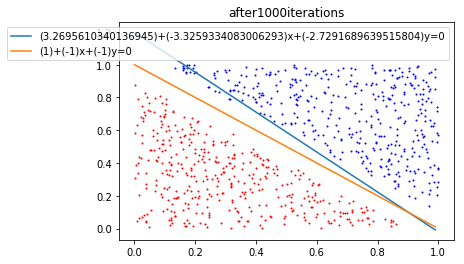

In [7]:
Adaline(1000,10000,0.1,np.array([1,-1,-1]),0,1)

n:1error rate is0.1057


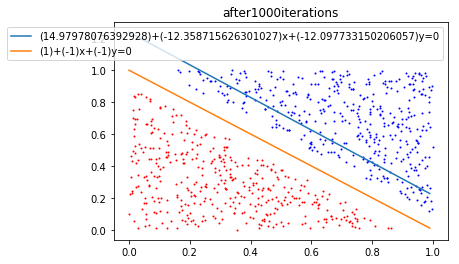

In [8]:
Adaline(1000,10000,1,np.array([1,-1,-1]),0,1)